In [18]:
from pandas import *
import matplotlib as mpl
mpl.rc('figure', figsize=(12, 6))
set_printoptions(max_columns=18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [207]:
DataFrame.add?

In [2]:
fec = read_csv('P00000001-ALL.txt')
# this takes a long time
# fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(datetools.to_datetime)

# pickle as 'fec_data' then use this next time
#fec = load('fec_data')

In [13]:
def convert_date(datestr):
    d, m, y = datestr.split('-')
    m = months[m]
    return datetime(int('20' + y), int(m), int(d))
fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(convert_date)

In [17]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
dtypes: float64(1), int64(1), object(14)

In [49]:
import pandas
pandas.

In [50]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
dtypes: float64(1), int64(1), object(14)

In [ ]:
df = DataFrame(np.random.randn(50, 

In [62]:
foo = fec.cand_nm.copy()
res = foo[np.random.permutation(len(foo))]

In [75]:
DataFrame({'foo' : {'a': 1, 'b':2}, 'bar': {'a':np.zeros(5), 'b':1, 'c':2}}, index=['c', 'b', 'a', 'd'], columns=['foo', 'bar'])

,foo,bar
c,NaN,2
b,2,1
a,1,[ 0. 0. 0. 0. 0.]
d,NaN,NaN


In [70]:
del fec['foo']

In [71]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
dtypes: float64(1), int64(1), object(14)

In [78]:
parties

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [220]:
fec.cand_nm.map(parties).value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702

In [83]:
[parties[name] for name in fec.cand_nm]
fec.cand_nm.map(parties).value_counts()
# fec.cand_nm.map(parties).value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702

In [221]:
fec['party'] = fec.cand_nm.map(parties)

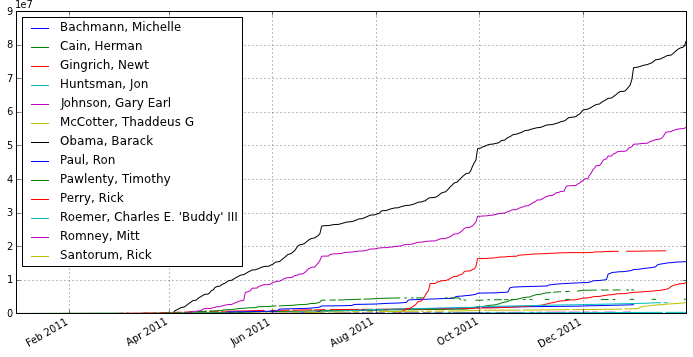

In [235]:
set_printoptions(max_rows=500)
grouped = fec.groupby(['cand_nm', 'contb_receipt_dt'])
result = grouped['contb_receipt_amt'].sum()
result.unstack('cand_nm').cumsum().plot()

In [241]:
set_printoptions(notebook_repr_html=False)
df = DataFrame(randn(10, 4), index=DateRange('1/1/2000', periods=10))
Panel({'item1':df, 'item2':df}).to_frame().ix[datetime(2000, 1, 5):datetime(2000, 1, 10)]

                     item1     item2
major      minor                    
2000-01-05 0     -0.304216 -0.304216
           1      0.175020  0.175020
           2     -1.825847 -1.825847
           3      0.616144  0.616144
2000-01-06 0     -1.187492 -1.187492
           1      0.304283  0.304283
           2     -0.739825 -0.739825
           3     -2.686096 -2.686096
2000-01-07 0      0.475826  0.475826
           1     -0.359847 -0.359847
           2      0.525797  0.525797
           3      1.047955  1.047955
2000-01-10 0     -1.446176 -1.446176
           1     -2.554074 -2.554074
           2      0.905620  0.905620
           3      1.389884  1.389884

In [85]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
party                536041  non-null values
dtypes: float64(1), int64(1), object(15)

In [86]:
fec.cand_nm.unique()

array([Bachmann, Michelle, Romney, Mitt, Obama, Barack,
       Roemer, Charles E. 'Buddy' III, Pawlenty, Timothy,
       Johnson, Gary Earl, Paul, Ron, Santorum, Rick, Cain, Herman,
       Gingrich, Newt, McCotter, Thaddeus G, Huntsman, Jon, Perry, Rick], dtype=object)

In [87]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
party                536041  non-null values
dtypes: float64(1), int64(1), object(15)

In [25]:
grouped = fec.groupby(['cand_nm', 'contb_receipt_dt'])

by_date = grouped['contb_receipt_amt'].sum()
by_date = by_date.unstack(0)
by_date[of_interest].cumsum().plot()

In [136]:
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536041 entries, 0 to 536040
Data columns:
cmte_id              536041  non-null values
cand_id              536041  non-null values
cand_nm              536041  non-null values
contbr_nm            536041  non-null values
contbr_city          536026  non-null values
contbr_st            536040  non-null values
contbr_zip           535973  non-null values
contbr_employer      531417  non-null values
contbr_occupation    531448  non-null values
contb_receipt_amt    536041  non-null values
contb_receipt_dt     536041  non-null values
receipt_desc         8479  non-null values
memo_cd              49718  non-null values
memo_text            52740  non-null values
form_tp              536041  non-null values
file_num             536041  non-null values
party                536041  non-null values
dtypes: float64(1), int64(1), object(15)

In [163]:
result = fec.groupby('cand_nm')['contb_receipt_amt'].apply(lambda x: Series(x.order()[-5:].values))

In [183]:
df1 = DataFrame({'k1' : ['a', 'b', 'c', 'a', 'b', 'c'], 
                'k2':['one', 'one', 'one', 'two', 'two', 'two'], 'v1':randn(6), 'v2':randn(6)})
df2 = DataFrame({'k1' : ['a', 'b', 'c', 'a', 'b', 'c'], 
                'k2':['one', 'one', 'one', 'two', 'two', 'two'], 'v1':randn(6), 'v2':randn(6)})
df3 = DataFrame({'k1' : ['a', 'b', 'c', 'a', 'b', 'c'], 
                'k2':['one', 'one', 'one', 'two', 'two', 'two'], 'v1':randn(6), 'v2':randn(6)})
df = concat([df1, df2, df3])
def f(group):
    return group['v1'].corr(group['v2'])
# df.groupby(['k1', 'k2']).apply(f).unstack()
df.pivot_table(['v1', 'v2'], rows='k1', cols='k2', aggfunc=f)

Exception: Index cannot contain duplicate values!

In [177]:
df

,k1,k2,v1,v2
0,a,one,1.428155,0.803457
1,b,one,0.174513,-0.163652
2,c,one,0.491576,-1.615540
3,a,two,0.335232,0.021276
4,b,two,-1.817989,-1.588397
5,c,two,-0.437044,-0.228216
0,a,one,1.033687,-2.246327
1,b,one,1.290898,-0.323642
2,c,one,2.175360,0.097117
3,a,two,-0.798585,-1.231085


In [242]:
set_printoptions(notebook_repr_html=True)
fec.pivot_table('contb_receipt_amt', rows='contbr_st', cols='cand_nm', aggfunc=np.sum, fill_value=0)

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contbr_st,,,,,,,,,,,,,
AA,0.00,250.00,0.00,275.00,0.00,0,28645.00,650.00,0.00,0.00,0.00,0.00,0.00
AB,0.00,0.00,0.00,0.00,0.00,0,1536.00,0.00,0.00,0.00,0.00,0.00,0.00
AE,1750.00,1005.00,4675.00,300.00,0.00,0,18708.00,40365.35,0.00,1550.00,310.00,4380.00,500.00
AK,7890.50,30503.92,23530.00,2500.00,1900.00,0,159447.40,96261.18,250.00,3900.00,705.00,54110.24,4984.74
AL,24932.00,93936.87,122833.00,4500.00,600.00,0,273970.37,169820.99,15300.00,30999.96,5700.24,289743.48,27856.00
AP,1000.00,500.00,1800.00,625.00,0.00,0,27620.00,25074.08,0.00,0.00,220.00,600.00,0.00
AR,18350.00,54711.02,49465.00,13604.00,250.00,0,160254.33,85272.56,13350.00,29565.00,1611.00,57110.50,8275.00
AS,0.00,0.00,0.00,0.00,0.00,0,1750.00,0.00,0.00,0.00,0.00,0.00,0.00
AZ,63427.00,241891.63,169083.00,60618.00,8900.00,0,756441.19,362187.89,90075.00,79099.00,6181.12,1139583.82,45505.00


In [139]:
grouped = fec.groupby(['cand_nm', 'contb_receipt_dt'])
# grouped = fec.groupby(['cand_nm', 'contbr_st'])
grouped['contb_receipt_amt'].apply(lambda x: x.order()[-5:])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3102 entries, ('Bachmann, Michelle', datetime.datetime(2011, 6, 13, 0, 0)) to ('Santorum, Rick', datetime.datetime(2012, 1, 31, 0, 0))
Data columns:
22        1  non-null values
23        1  non-null values
58        1  non-null values
76        1  non-null values
80        1  non-null values
84        1  non-null values
91        1  non-null values
95        1  non-null values
149       1  non-null values
186       1  non-null values
204       1  non-null values
211       1  non-null values
255       1  non-null values
258       1  non-null values
288       1  non-null values
323       1  non-null values
350       1  non-null values
351       1  non-null values
353       1  non-null values
360       1  non-null values
402       1  non-null values
607       1  non-null values
725       1  non-null values
747       1  non-null values
1391      1  non-null values
1924      1  non-null values
1997      1  non-null values
1998      1  non-n

In [145]:
fec.contb_receipt_amt.describe()

count     536041.000000
mean         375.037308
std         3564.435704
min       -30800.000000
25%           50.000000
50%          100.000000
75%          250.000000
max      1944042.430000

In [150]:
fec.groupby('cand_nm').count()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
cand_nm,,,,,,,,,,,,,,,,,
"Bachmann, Michelle",12322,12322,12322,12322,12321,12322,12322,12257,12303,12322,12322,12,0,0,12322,12322,12322
"Cain, Herman",19924,19924,19924,19924,19924,19924,19924,19797,19840,19924,19924,41,26,22,19924,19924,19924
"Gingrich, Newt",27740,27740,27740,27740,27739,27740,27739,27684,27681,27740,27740,819,673,912,27740,27740,27740
"Huntsman, Jon",4143,4143,4143,4143,4141,4143,4140,4119,4123,4143,4143,182,139,205,4143,4143,4143
"Johnson, Gary Earl",702,702,702,702,702,702,702,642,692,702,702,0,0,0,702,702,702
"McCotter, Thaddeus G",74,74,74,74,74,74,74,62,63,74,74,0,0,0,74,74,74
"Obama, Barack",292400,292400,292400,292400,292400,292399,292378,289875,289802,292400,292400,2303,46155,46718,292400,292400,292400
"Paul, Ron",87697,87697,87697,87697,87697,87697,87664,87324,87305,87697,87697,398,107,150,87697,87697,87697
"Pawlenty, Timothy",4532,4532,4532,4532,4532,4532,4532,4182,4182,4532,4532,1199,729,913,4532,4532,4532


In [147]:
fec.sort_index(by='contb_receipt_amt')[-10:]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
359998,C00494393,P20002556,"Pawlenty, Timothy","HUBBARD, R. D. MR.",RUIDOSO,NM,883457700,RETIRED,RETIRED,10000.00,2011-05-03 00:00:00,SEE REATTRIBUTION,NaN,SEE REATTRIBUTION,SA17A,748365,Republican
359005,C00494393,P20002556,"Pawlenty, Timothy","DAVIS, MARTIN E. MR.",SHOREWOOD,MN,553318321,CAMBRIA,GENERAL MANAGER,10000.00,2011-06-22 00:00:00,SEE REATTRIBUTION,NaN,SEE REATTRIBUTION,SA17A,748365,Republican
478807,C00496067,P00003608,"Cain, Herman","HILDE, AL",JACKSON,WY,830019347,INFORMATION REQUESTED,INFORMATION REQUESTED,10000.00,2011-10-25 00:00:00,NaN,NaN,NaN,SA17A,763621,Republican
35412,C00431171,P80003353,"Romney, Mitt",NORPAC,ENGLEWOOD CLIFFS,NJ,07632,NaN,NaN,12700.00,2011-09-29 00:00:00,NaN,X,EARMARKED CONTRIBUTIONS FROM CONDUIT,SA17A,760261,Republican
71379,C00431445,P80003338,"Obama, Barack","DAVIS, STEPHEN JAMES",SAN FRANCISCO,CA,941151123,BANNEKER PARTNERS,ATTORNEY,25800.00,2011-05-10 00:00:00,NaN,NaN,CONTRIBUTION REFUNDED ON 7/8/11,SA17A,756214,Democrat
61937,C00431445,P80003338,"Obama, Barack","MURPHY, CYNTHIA C.",LITTLE ROCK,AR,722075462,MURPHY GROUP,PUBLIC RELATIONS,33300.00,2011-05-25 00:00:00,NaN,NaN,NaN,SA17A,756214,Democrat
133568,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,WASHINGTON,DC,20003,NaN,NaN,451726.00,2011-06-30 00:00:00,NaN,X,*,SA18,756214,Democrat
177473,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,512710.91,2012-01-31 00:00:00,NaN,X,*,SA18,766535,Democrat
162313,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1511192.17,2011-09-30 00:00:00,NaN,X,*,SA18,756218,Democrat
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31 00:00:00,NaN,X,*,SA18,763233,Democrat


In [140]:
res = _

In [142]:
res[:100].stack()

cand_nm             contb_receipt_dt        
Bachmann, Michelle  2011-06-13        76        2500
                                      80        2500
                                      84        2500
                                      360       1000
                                      509162    1000
                    2011-06-14        509845    2500
                                      511239    2500
                                      514049    2500
                                      514998    2500
                                      517908    2500
                    2011-06-15        513424    2500
                                      514103    2500
                                      514396    2500
                                      517373    2500
                                      517839    2500
...
Bachmann, Michelle  2011-09-19        506718     501
                                      509493    2500
                                      511088    25

In [134]:
result.unstack('cand_nm').unstack('contbr_st').median(axis=1, level='cand_nm')

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 2011-01-01 00:00:00 to 2012-01-31 00:00:00
Data columns:
Bachmann, Michelle                200  non-null values
Cain, Herman                      319  non-null values
Gingrich, Newt                    317  non-null values
Huntsman, Jon                     213  non-null values
Johnson, Gary Earl                190  non-null values
McCotter, Thaddeus G              38  non-null values
Obama, Barack                     303  non-null values
Paul, Ron                         281  non-null values
Pawlenty, Timothy                 216  non-null values
Perry, Rick                       160  non-null values
Roemer, Charles E. 'Buddy' III    314  non-null values
Romney, Mitt                      296  non-null values
Santorum, Rick                    255  non-null values
dtypes: float64(13)

In [184]:
babies = read_csv('baby-names2.csv')
births = read_csv('births.csv')

In [129]:
babies[:50]

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [187]:
import pandas.util.testing as tm
df = tm.makeTimeDataFrame()
ts = df['A']

In [193]:
ts1 = ts[:7]
ts2 = ts[:9]

2000-01-03    2.196900
2000-01-04   -0.999768
2000-01-05    1.690059
2000-01-06    1.119271
2000-01-07   -1.587614
2000-01-10   -2.199279
2000-01-11   -2.254439
2000-01-12    1.157619
2000-01-13    0.780915
Name: A

In [197]:
Factor(fec.cand_nm)

Factor:
array([Bachmann, Michelle, Bachmann, Michelle, Bachmann, Michelle, ...,
       Perry, Rick, Perry, Rick, Perry, Rick], dtype=object)
Levels (13): array([Bachmann, Michelle, Cain, Herman, Gingrich, Newt, Huntsman, Jon,
       Johnson, Gary Earl, McCotter, Thaddeus G, Obama, Barack, Paul, Ron,
       Pawlenty, Timothy, Perry, Rick, Roemer, Charles E. 'Buddy' III,
       Romney, Mitt, Santorum, Rick], dtype=object)

In [202]:
x

,B,C,D
2000-01-03 00:00:00,-0.779028,-0.721610,-1.528296
2000-01-04 00:00:00,-1.621385,-0.773365,0.875603
2000-01-05 00:00:00,-0.034184,-0.401620,-0.131541
2000-01-06 00:00:00,1.220423,-0.031725,1.520886
2000-01-07 00:00:00,2.840327,-0.716051,1.749560
2000-01-10 00:00:00,0.321776,0.699181,-1.103870
2000-01-11 00:00:00,0.465374,0.246970,0.356292
2000-01-12 00:00:00,-0.182423,-1.742033,-1.533021
2000-01-13 00:00:00,1.006741,0.064173,-1.229465
2000-01-14 00:00:00,-0.793282,-0.924148,0.634416


In [198]:
import scikits.statsmodels.api as sm
y = df.pop('A')
x = df
res = sm.OLS(y, x).fit()

In [205]:
x

,B,C,D
2000-01-03 00:00:00,-0.779028,-0.721610,-1.528296
2000-01-04 00:00:00,-1.621385,-0.773365,0.875603
2000-01-05 00:00:00,-0.034184,-0.401620,-0.131541
2000-01-06 00:00:00,1.220423,-0.031725,1.520886
2000-01-07 00:00:00,2.840327,-0.716051,1.749560
2000-01-10 00:00:00,0.321776,0.699181,-1.103870
2000-01-11 00:00:00,0.465374,0.246970,0.356292
2000-01-12 00:00:00,-0.182423,-1.742033,-1.533021
2000-01-13 00:00:00,1.006741,0.064173,-1.229465
2000-01-14 00:00:00,-0.793282,-0.924148,0.634416


In [204]:
ols(y=y, x=x, window=10).beta

,B,C,D,intercept
2000-01-14 00:00:00,0.097849,-0.631871,-0.364008,-0.246238
2000-01-17 00:00:00,0.044081,-0.761076,-0.307508,-0.436251
2000-01-18 00:00:00,-0.170571,-0.554817,-0.199920,-0.167603
2000-01-19 00:00:00,0.035460,-0.492634,-0.226241,-0.482092
2000-01-20 00:00:00,0.146031,-0.373458,-0.604335,-0.816768
2000-01-21 00:00:00,-0.079546,-0.467875,-0.815151,-0.622652
2000-01-24 00:00:00,-0.008007,-0.421989,-0.970575,-0.543737
2000-01-25 00:00:00,0.057857,-0.272159,-0.850459,-0.542233
2000-01-26 00:00:00,0.097036,-0.298163,-0.759791,-0.579624
2000-01-27 00:00:00,0.007539,-0.327269,-0.700978,-0.693929


In [206]:
ols

<function pandas.stats.interface.ols>

In [200]:
res.params

B    0.113124
C   -0.351027
D   -0.300097

In [125]:
!head -n 10 baby-names2.csv

"year","name","prop","sex","soundex"
1880,"John",0.081541,"boy","J500"
1880,"William",0.080511,"boy","W450"
1880,"James",0.050057,"boy","J520"
1880,"Charles",0.045167,"boy","C642"
1880,"George",0.043292,"boy","G620"
1880,"Frank",0.02738,"boy","F652"
1880,"Joseph",0.022229,"boy","J210"
1880,"Thomas",0.021401,"boy","T520"
1880,"Henry",0.020641,"boy","H560"

In [115]:
result.unstack('cand_nm').stack().swaplevel('cand_nm', 'contbr_st').sortlevel(0)

cand_nm             contbr_st
Bachmann, Michelle  AE              3
                    AK             54
                    AL            124
                    AP              1
                    AR            129
                    AZ            311
                    CA           1748
                    CO            241
                    CT            141
                    DC             18
                    DE             37
                    FL            657
                    GA            236
                    GU              5
                    HI             26
...
Santorum, Rick  PA           1506
                PR              2
                RI             22
                SC            294
                SD             43
                TN            135
                TX            807
                UT             22
                VA            470
                VI              2
                VT             19
                WA    

In [98]:
result['Paul, Ron']#.cumsum().plot()

contb_receipt_dt  contbr_st
2011-04-26        AL           1
                  AZ           1
                  CA           4
                  DE           2
                  FL           1
                  IA           1
                  MN           1
                  MS           1
                  NV           1
                  NY           1
                  PA           1
                  TX           2
                  VA           1
                  WA           1
2011-04-27        AR           1
...
2012-01-31        NV            1
                  NY            4
                  OH            5
                  OK            2
                  OR            3
                  PA            6
                  SC            2
                  TN            4
                  TX           19
                  UT            1
                  VA            2
                  VT            1
                  WA            5
                  WI           

In [27]:
grouped = fec.groupby(['cand_nm', 'contbr_occupation'])
by_occupation = grouped['contb_receipt_amt'].sum()

In [28]:
by_occupation.unstack(0)

In [29]:
by_occupation = by_occupation.unstack(0)

In [30]:
[x for x in by_occupation.index if 'ZOMBIE' in x]

In [31]:
by_occupation['Obama, Barack'].dropna().order(ascending=False)[:20]

In [32]:
by_occupation['Romney, Mitt'].dropna().order(ascending=False)[:20]

In [33]:
by_occupation['Paul, Ron'].dropna().order(ascending=False)[:20]

In [34]:
df = fec[(fec.contbr_occupation == 'ZOMBIE SLAYER').fillna(False)]
df

In [35]:
df.contb_receipt_amt.sum()

In [36]:
fec[fec.contb_receipt_amt > 100000].T

In [37]:
grouped = fec.groupby('contbr_st')
result = grouped.apply(lambda x: len(x['contbr_nm'].unique()))
result.order(ascending=False)

In [38]:
nrecords = fec.groupby(['contbr_st', 'cand_nm']).size()
nrecords.groupby(level='contbr_st').apply(lambda x: x.idxmax()[1])

In [39]:
(fec.contb_receipt_amt < 0).sum()

In [40]:
total = fec.groupby(['contbr_st', 'cand_nm'])['contb_receipt_amt'].sum()
total.groupby(level='contbr_st').apply(lambda x: x.idxmax()[1])

In [41]:
nparties = fec.groupby(['contbr_nm', 'party']).size().count(level=0)
multi_party = nparties[nparties > 1]

In [42]:
len(multi_party)

In [43]:
bins = [0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

def bucket(s, bins, closed='left', strings=True):
    bins = np.asarray(bins)
    labels = bins.searchsorted(s.values, side=closed)
    
    if strings:
        if closed == 'left':
            strings = ['[%s, %s)' % tup for tup in zip(bins, bins[1:])]
        else:
            strings = ['(%s, %s]' % tup for tup in zip(bins, bins[1:])]
        strings = np.asarray(strings, dtype=object)
        return strings.take(labels - 1)
    
    return labels, s.values

fec.groupby(bucket(fec.contb_receipt_amt, bins))['contb_receipt_amt'].size()